In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogsvscats

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogsvscats.zip')
zip_file.extractall('/content')
zip_file.close()

# VGG-16 Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [ ]:
# Generators dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', labels = 'inferred',
    label_mode = 'int', batch_size=32, image_size=(256,256))

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', labels = 'inferred',
    label_mode = 'int', batch_size=32, image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

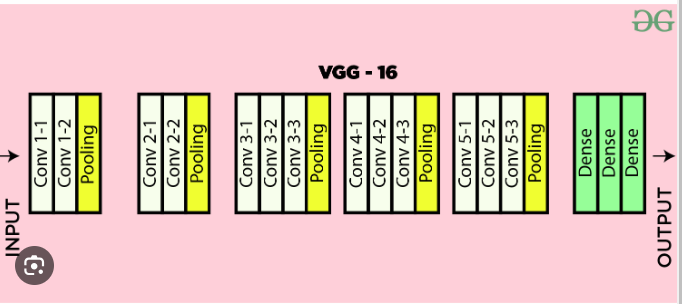

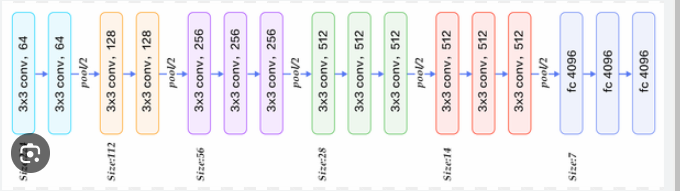

In [ ]:
model = Sequential()

# block 1
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# block 2
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# block 3
model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# block 4
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# block 5
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Flatten
model.add(Flatten())

# FC 1
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))

# FC2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
# Output
model.add(Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 252, 252, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=5,monitor="val_loss",restore_best_weights=True)

In [ ]:
history = model.fit(train_ds, epochs=500, validation_data=val_ds, callbacks=[earlystopping])

Epoch 1/500
625/625 [==============================] - 409s 594ms/step - loss: 0.8633 - accuracy: 0.5386 - val_loss: 0.7025 - val_accuracy: 0.5158
Epoch 2/500
625/625 [==============================] - 354s 566ms/step - loss: 0.6972 - accuracy: 0.5605 - val_loss: 0.7312 - val_accuracy: 0.5364
Epoch 3/500
625/625 [==============================] - 355s 567ms/step - loss: 0.6802 - accuracy: 0.5767 - val_loss: 0.6586 - val_accuracy: 0.6062
Epoch 4/500
625/625 [==============================] - 371s 593ms/step - loss: 0.6747 - accuracy: 0.5935 - val_loss: 0.6711 - val_accuracy: 0.5990
Epoch 5/500
625/625 [==============================] - 354s 566ms/step - loss: 0.6639 - accuracy: 0.6105 - val_loss: 0.7053 - val_accuracy: 0.5678
Epoch 6/500
625/625 [==============================] - 351s 561ms/step - loss: 0.6542 - accuracy: 0.6245 - val_loss: 0.9183 - val_accuracy: 0.5010
Epoch 7/500
625/625 [==============================] - 365s 584ms/step - loss: 0.6203 - accuracy: 0.6625 - val_loss: 0